## **Text Analysis Amazon Reviews**
For this notebook we will be looking at analysis and pre-processing of textual data. The dataset that we will be using for this is a sample of Amazon reviews. The tutorial was originally designed around a 10 times larger extract but the file size caused problems, so it now uses a smaller sample. It should still make sense but if not the original dataset can be found online. This includes the score, a short summary of the review and the review itself. 
As with all the previous notebooks, the first step is to make the connection with the Google Drive folder containing the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


This piece of code imports the libraries that we will be using in the first part of this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we will be creating the dataframe from the csv file, **make sure that the path to the csv file is correct!**
The dataframe is called reviews in this example, but you can change it to anything else, but make sure that this is changed throughout the whole document if you decide to do this.
We can also print the first few rows of the data to see what it looks like. The 'head' function prints out the first 5 rows by default but if you wanted, say, 10 you just need to put 10 in the brackets.

In [21]:
data_dir = '/content/gdrive/My Drive/MLC/Session 1/Data/'
reviews = pd.read_csv(data_dir + 'Amazon_Reviews_sample.csv')

In [23]:
reviews

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,429634,429635,B0002PSOJW,A1JTTI1KH3DOCY,"Doggymcnuggets ""doggymcnuggets""",1,2,5,1313280000,It's All About the Flavor!,"I was cruising the aisles of my local ""largest..."
1,344098,344099,B008J1HO4C,A3QOBM06U2LIH1,"David H. Boyle ""David H Boyle""",4,4,5,1229990400,Irish Oatmean is 50% of my diet.,"True ... I eat only twice a day, at noon and a..."
2,287601,287602,B002LSI1SW,AC6BO713YK4YR,Murphy,0,0,5,1326585600,My cats love them,"I purchased this for my mother's cat, but he d..."
3,87884,87885,B008O3G25W,A20MMOYFA8BTNR,"McCarth ""aka sLiM sHaDy""",0,2,1,1320537600,Pointless dog treat,Are we seriously supposed to stand there for h...
4,466037,466038,B001E18K8S,A1BENRNL86IXG,Debbie,2,2,5,1343001600,magnesium powder drink,"This drink is easy to mix, tastes good and is ..."
...,...,...,...,...,...,...,...,...,...,...,...
56834,506674,506675,B000VK6TGI,A35R32TA60XD57,M. Torma,0,0,3,1302652800,Good food but...,"I do think this is a good food. However, it i..."
56835,173150,173151,B002GWFAUU,A3DXMPD67W5PH0,"B. K. Lindberg ""Brad""",0,0,4,1350000000,Excellent value,Very good quality for the price. I am trying ...
56836,423373,423374,B005VOONGM,AJV985MKGCIQ0,"Barbara Rhoades ""Jackie of all Trades""",0,1,5,1335139200,GREAT coffee in a self-contain package,I love a good cup of coffee but hate to brew a...
56837,552156,552157,B00017L1UK,AQOFHS4H4ELNU,EmbeddedFlyer,1,1,5,1271030400,Tastes Better Than Some Theaters,"Cooked in a Whirly Pop this is a lot like, and..."


In [20]:
reviews.to_csv(data_dir + 'Amazon_Reviews_sample.csv')

In [22]:
reviews.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,429634,429635,B0002PSOJW,A1JTTI1KH3DOCY,"Doggymcnuggets ""doggymcnuggets""",1,2,5,1313280000,It's All About the Flavor!,"I was cruising the aisles of my local ""largest..."
1,344098,344099,B008J1HO4C,A3QOBM06U2LIH1,"David H. Boyle ""David H Boyle""",4,4,5,1229990400,Irish Oatmean is 50% of my diet.,"True ... I eat only twice a day, at noon and a..."
2,287601,287602,B002LSI1SW,AC6BO713YK4YR,Murphy,0,0,5,1326585600,My cats love them,"I purchased this for my mother's cat, but he d..."
3,87884,87885,B008O3G25W,A20MMOYFA8BTNR,"McCarth ""aka sLiM sHaDy""",0,2,1,1320537600,Pointless dog treat,Are we seriously supposed to stand there for h...
4,466037,466038,B001E18K8S,A1BENRNL86IXG,Debbie,2,2,5,1343001600,magnesium powder drink,"This drink is easy to mix, tastes good and is ..."


Having had a quick look at the first few rows of data, it does not gives us much insight into the textual reviews included in the dataset. To showcase these in more detail, the reviews can be printed. If you change the number 5 in the piece of code below, the number of reviews printed will change accordingly. 

**The Amazon dataset seems to mainly contain one type of review, can you guess what type and does this visualisation help with this analysis?**



In [9]:
R = 5
for i, review in enumerate(reviews['Text'][:R]):
    print(str(i+1) + ') ' + review+'\n'+'\n')

1) I was cruising the aisles of my local "largest retailer in the US" super store one day and spotted the rooster-adorned bottle with the green lid...I had never tasted, noticed, or even heard of this stuff before, but as a hot sauce enthusiast I decided to give it a shot.  Serendipity, baby!  Sriracha (hey Pat Sajak, can I buy another vowel?  how do you pronounce this anyway?!) is now my absolute favorite hot sauce, and I have about 20+ varieties on the shelf at this very moment.  One of the crucial elements to a good hot sauce is the right blend of heat and flavor, and it's a delicate balance.  Some get the flavor but not the heat (Frank's), while others get the heat right but lack flavor (yes I am talking to you, you plethora of generic Habanero-based hot sauces).  Sriracha, however, nails it both ways.  It packs some legitimate kick, but it isn't an endurance contest either.  When it's there, it wakes you up, kicks you in the pants, and you know your dish has been revved up a few n

For the next part of the analysis we will be looking at two different ways to display textual data. As textual data is slightly different than the numerical datasets we worked with before, we cannot simply use graphs and averages. We will be using a word cloud and a technique used in pre-processing of mainly Natural Language Processing and Information Retrieval called "Bag-of-words". 

To ensure that these methods work, we need to get rid of the null (missing) values in our dataset. These are rows in our dataset where no review has been entered.

Before we do that we will count how many rows are in the dataset. The count command tells us how many values are in each column. You will see that some of the columns have fewer than others.

In [10]:
reviews.count()

Id                        56845
ProductId                 56845
UserId                    56845
ProfileName               56841
HelpfulnessNumerator      56845
HelpfulnessDenominator    56845
Score                     56845
Time                      56845
Summary                   56843
Text                      56845
dtype: int64

Now let's drop the rows with blanks in and count again. Now all the columns have the same counts, but we have lost 40 or so rows. **Does this matter?**

In [11]:
reviews.dropna(inplace=True)
reviews.count()

Id                        56839
ProductId                 56839
UserId                    56839
ProfileName               56839
HelpfulnessNumerator      56839
HelpfulnessDenominator    56839
Score                     56839
Time                      56839
Summary                   56839
Text                      56839
dtype: int64

### **Word Cloud**

The first method that we are going to use to look at the data is a word cloud. To make this work we first have to import two libraries from wordcloud, one of them getting rid of stopwords in the text. Stopwords are generally very common words that dominate the text without providing any insight (e.g the, of, and). Often when using text for ML we might create our own domain specific stopword list. For example, we may wish to add 'archive' and 'record' to a list. Also, to make this work the input needs to be a single string of text. This is where the reviews_str subset comes into play, where we are using the Summaries (see data overview above) to make one long string from our data.

After this we can plot the string and see which words are most prominent. You can play around with the plot values here. 

**What happens if you use the Text column instead of the Summary column to plot the word cloud?** (change reviews.Summary.str.cat() to reviews.Text.str.cat())

**The word cloud seems to predominantly be positive words, why do you think this is?** 

**Do you think the word cloud is a good representation of the data?**

**Try adding your own stopwords into the square brackets after "custom_stop_words = ".** Add 'good', for example. Words must be in quotes and if you want more than one word, separate them with a comma**



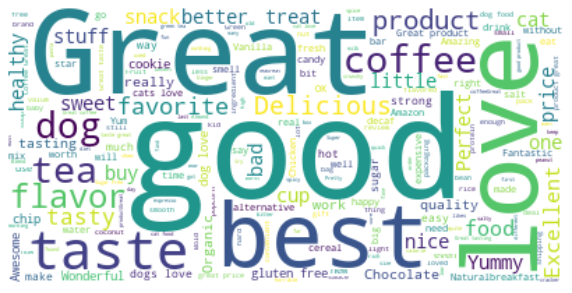

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

custom_stop_words = []
[STOPWORDS.add(n) for n in custom_stop_words]
reviews_str = reviews.Summary.str.cat()

wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

As can be seen from the word cloud, the words seem to be predominantly positive. To have a closer look at this, we could have a look at the ratings that are also provided in the dataset. This can be plotted on a simple graph.

**What does this tell us about the data?**

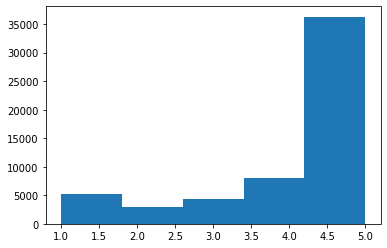

Score
1     5196
2     3023
3     4273
4     8054
5    36293
Name: Id, dtype: int64


In [13]:
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

As can be seen from the previous plot, the data seems to be very skewed towards positive reviews, but what happens if we make a separate word cloud for the positive and the negative reviews?

For this example the negative reviews are reviews with a 1 or 2 star rating and the positive reviews are the reviews with a 4 or 5 star rating. **Do you agree with this classification and if not, how would you change it?**

You may have found with the previous word cloud, the notebook crashes at a certain point because of the RAM (memory) available. Often it is worth working with a sample to avoid these problems and also allow your analysis to iterate more quickly.

As the data is skewed towards the positive reviews we will take a subset of those, roughly equal in size to the negative reviews.

After completing this step, we change the subsets into strings again and we can plot the word clouds.

**Does this give you a better insight into the data?**

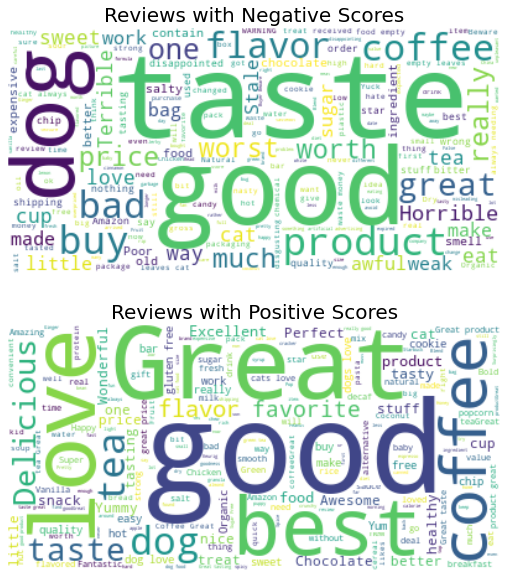

In [15]:

negative_reviews = reviews[reviews['Score'].isin([1,2]) ]
positive_reviews = reviews[reviews['Score'].isin([4,5]) ]

positive_reviews = positive_reviews.sample(n=20000) 


negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)

plt.show()

### **Bag-of-Words**

The word clouds have given us an idea of the dataset, but the words that appear on them are very obvious. Bag-of-Words may be able to give us more insight into the data. This is where the words are created into features for further processing, a more detailed explanation of Bag-of-Words is found here: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

The technique is called Bag-of-Words, as it gets rid of the structure of the text, essentially being a random selection of words, or a bag of words. To make this work, the data has to be parsed into an n-gram which is just a string of 'n' (some number) words. For this example we are using 3 (a 3-gram or trigram). Which means that sequences of three words are taken, for example 'it was good', instead of only 'good'. Hopefully this will give us a better understanding of our dataset.

There are a number of parameters we can set, one of which is the max features. This is basically the maximum number of distinct n-grams it will find. In this case it is set to 2000, as this is the maximum that the RAM can take. Also, no stop words are used. This is done to make sure that meaningful sentences are extracted.

The output will be a "vectorised" shape for both the negative and positive reviews. Vectorised is just a computery term for lists of numbers. Think of them as grids of numbers (20000 rows by 2000 columns in the positive case).

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

N = 3
Min_N = N
Max_N = N + 0

negative_vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(Min_N, Max_N), 
                       max_df=1.0, min_df=1, max_features=2000,use_idf=False)
negative_vectorized = negative_vectorizer.fit_transform(negative_reviews.Summary)

positive_vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(Min_N, Max_N), 
                       max_df=1.0, min_df=1, max_features=2000,use_idf=False)
positive_vectorized = positive_vectorizer.fit_transform(positive_reviews.Summary)

print(negative_vectorized.shape)
print(positive_vectorized.shape)

(8219, 2000)
(20000, 2000)


This is where we create the actual table with the highest scoring terms for the negative reviews. This scoring is based on the frequency. 

**What does this say about the data?**

**Can you get a better understanding of the dataset from this method instead of the word cloud?**

In [17]:
negative_vocab = negative_vectorizer.get_feature_names()
negative_vectorized_df = pd.DataFrame(negative_vectorized.todense(),columns=[negative_vocab]).sum()
negative_term_f = negative_vectorized_df.sort_values(ascending=False)
negative_term_f.head(30)

made in china          39.560478
not for me             32.121320
do not buy             31.802754
not what expected      28.207107
not very good          25.016508
this is not            24.007692
not worth the          23.763456
not the same           23.573174
not so good            21.991564
not so great           20.914214
waste of money         20.690234
not the best           19.584662
as good as             19.206738
not worth it           18.439158
not as good            18.288053
not my favorite        16.414214
waste your money       15.777050
used to be             15.589619
don waste your         15.252486
if you like            12.648418
don buy this           10.144924
is empty leaves         9.899495
cat always needing      9.899495
empty leaves your       9.899495
your cat always         9.899495
filler food is          9.899495
food is empty           9.899495
always needing more     9.899495
leaves your cat         9.899495
not that great          9.894427
dtype: flo

This is the same process, but for the positive comments.

**Are these snippets as insightful as the ones from the negative comments?**

In [18]:
positive_vocab = positive_vectorizer.get_feature_names()
positive_vectorized_df = pd.DataFrame(positive_vectorized.todense(),columns=[positive_vocab]).sum()
positive_vectorized_df.sort_values(ascending=False).head(30)

my dog loves            51.876260
love this stuff         48.585422
my dogs love            40.480044
is the best             39.889887
one of the              35.815450
love this tea           35.000000
cats love it            29.501029
cup of coffee           29.293558
dogs love these         29.150207
dog loves it            28.400904
hard to find            27.811190
on the market           27.620591
dogs love it            27.034789
this stuff is           25.970563
of the best             25.666668
as good as              25.611759
on the go               25.553451
are the best            25.153196
simply the best         23.344935
if you like             22.576986
dog loves them          21.758388
in the world            21.727875
for the price           21.396977
my cats love            21.085871
dogs love them          21.079140
best gluten free        20.730181
better than expected    19.861807
love this product       19.000000
good but not            18.965131
one of my     

As we have now tried out the bag-of-word method, it would be useful to play around with the parameters in this method, to see how this changes the results.

**What happens if you add in stop words?**

**What happens if you change the maximum features?**

**What happens if you change the n-gram range?**
(Hint: change the value of N in the code. Change the 0 in "Max_N = N + 0" to another number - try 1 or 2)

That's the end of this tutorial in which you have learned:



*   The difficult challenges of analysing text data
*   How to create a Word Cloud and to use Stop Words
*   The benefits of sampling when working with large datasets
*   The concept of N-Grams
*   The Bag of Words model for finding key N-Grams


Later in the course we will introduce use some ML methods for understanding a text corpus

